In [1]:
import pandas as pd

## SALES ANALYSIS

## Importing libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Reading the sales files in the folder and combining them into 1 file

In [7]:
# Path to the directory containing the sales data
folder_path = r"C:\Users\Patri\Desktop\Studies\Python\Keith\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data"

# Initialize an empty list to store the dataframes
all_data = []

# Loop over all files in the directory
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(folder_path, file)  # Create full file path
        df = pd.read_csv(file_path)  # Read the CSV file into a dataframe
        all_data.append(df)  # Append the dataframe to the list

# Concatenate all dataframes into one
all_data_df = pd.concat(all_data, ignore_index=True)

# Save the combined dataframe to a new CSV file
output_file = r"C:\Users\Patri\Desktop\Studies\Python\Keith\Pandas-Data-Science-Tasks\SalesAnalysis\combined_sales_data.csv"
all_data_df.to_csv(output_file, index=False)

print("All files have been combined and saved to", output_file)


All files have been combined and saved to C:\Users\Patri\Desktop\Studies\Python\Keith\Pandas-Data-Science-Tasks\SalesAnalysis\combined_sales_data.csv


Reading the combined file and putting it into the data frame

In [4]:
path = r'C:\Users\Patri\Desktop\Studies\Python\Keith\Pandas-Data-Science-Tasks\SalesAnalysis\combined_sales_data.csv'

df = pd.read_csv(path)

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
#to check how many rows and columns in the data
df.shape

(186850, 6)

In [5]:
#To view the first 5 rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [64]:
#to view the last 3 rows
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Cleaning the Data

1.Dropping the Null value

In [5]:
#Checking for the bul values
df.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [6]:
#Dropping the null values
df = df.dropna()

In [67]:
df.shape

(186305, 6)

In [7]:
#Confirming if Null values have been dropped
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

2.Getting rid of text in the date column

In [8]:
df = df[df['Order Date'].str[0:2]!='Or']

In [71]:
df.shape

(185950, 6)

3.Making Columns the correct type

In [9]:
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each']= pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Patri\AppData\Local\Temp\ipykernel_12072\1390589970.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [10]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Removing the duplicates

In [11]:
df = df[df['Order ID'].duplicated(keep=False)]

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215"
...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016"


4.Adding a month column

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # Ensure 'Order Date' is in datetime format

df['Month'] = df['Order Date'].dt.month  # Access the month component


df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9


5.Adding City column

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA)


6. Adding the sales colimn

In [14]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta (GA),3.84
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),11.99
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),5.98
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,San Francisco (CA),600.00


## Data Exploration

Sales for each month

In [15]:
df.groupby('Month')['Sales'].sum()

Month
1     200532.35
2     244640.73
3     291465.51
4     382490.31
5     354477.67
6     285938.26
7     266313.86
8     235424.48
9     208410.31
10    410081.29
11    339327.13
12    480377.61
Name: Sales, dtype: float64

Plotting the sales visual

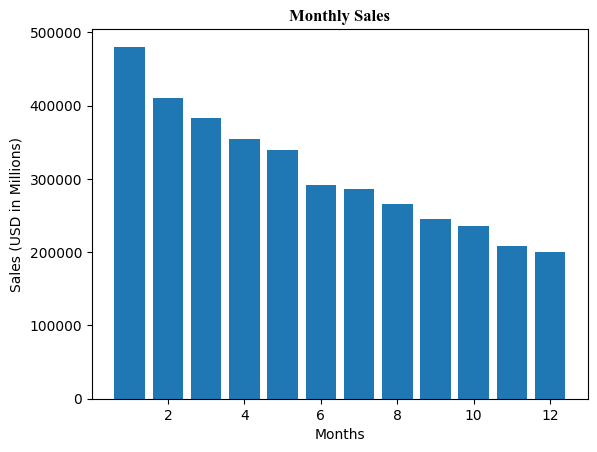

In [16]:
results = df.groupby('Month')['Sales'].sum()
results = results.sort_values(ascending=False)
months = range(1, 13)

font_dict = {
    'family': 'Times New Roman',   # You can change this to 'sans-serif', 'monospace', etc.
    'fontsize': 12,       # Font size
    'weight': 'bold'}     # Font weight

plt.title('Monthly Sales', font_dict)
plt.bar(months, results)
plt.xticks
plt.xlabel('Months')
plt.ylabel('Sales (USD in Millions)')

plt.show()

Total sales for each City

In [17]:
result1 = df.groupby('City')['Sales'].sum()

result1

City
Atlanta  (GA)          319432.46
Austin  (TX)           182136.48
Boston  (MA)           394961.30
Dallas  (TX)           284598.19
Los Angeles  (CA)      557713.16
New York City  (NY)    510436.35
Portland  (ME)          41917.36
Portland  (OR)         201192.01
San Francisco  (CA)    896779.93
Seattle  (WA)          310312.27
Name: Sales, dtype: float64

Plotting the Sales on each City

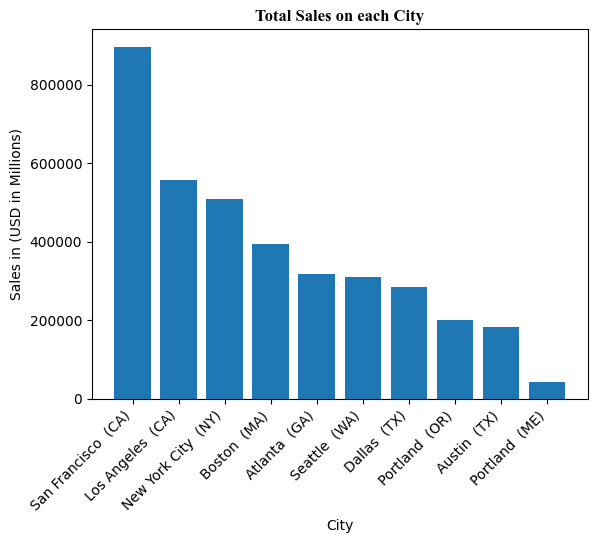

In [18]:
result1 = df.groupby('City')['Sales'].sum()
result1 = result1.sort_values(ascending=False)

plt.bar(result1.index, result1.values)
plt.title('Total Sales on each City', font_dict)
plt.xlabel('City')
plt.ylabel('Sales in (USD in Millions)')

# Rotate city labels on x-axis to prevent overlap
plt.xticks(rotation=45, ha='right')  # 'ha' aligns the labels to the right

plt.show()

What time should we display the advertisements to increase customer likelyhood to buy the product

In [19]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract the hour from 'Order Date' and create a new column 'Hour'
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1


# Check the result
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1


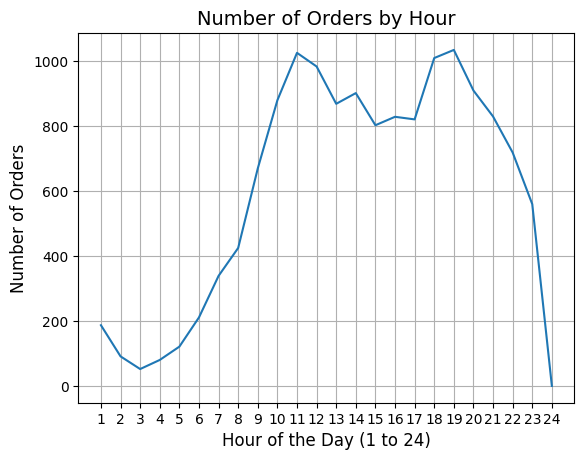

In [20]:
def count_orders_by_hour(df):
    # Group by the 'Hour' column and count the number of occurrences
    hour_count = df.groupby('Hour').size().reindex(range(1, 25), fill_value=0)
    
    return hour_count

# Call the function to get the count of orders by hour
hour_counts = count_orders_by_hour(df)


# Plot the bar graph
plt.plot(hour_counts.index, hour_counts.values)
plt.grid()
plt.xlabel('Hour of the Day (1 to 24)', fontdict={'fontsize': 12})
plt.ylabel('Number of Orders', fontdict={'fontsize': 12})
plt.title('Number of Orders by Hour', fontdict={'fontsize': 14})
plt.xticks(range(1, 25))  # Set the x-axis to show all hours from 1 to 24
plt.show()



What products that are often bought together

In [22]:
df = df[df['Order ID'].duplicated(keep=False)]

In [23]:
#grouping by order Number
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [25]:
from itertools import combinations  # Importing the combinations function from itertools to generate pair combinations
from collections import Counter  # Importing Counter from collections to count occurrences of pairs

count = Counter()  # Initializing a Counter object to keep track of pair frequencies

# Loop through each row in the 'Grouped' column of df2
for row in df2['Grouped']:
    row_list = row.split(',')  # Split the grouped product string into a list of individual products
    count.update(Counter(combinations(row_list, 2)))  # Create all possible pairs of two products, count them, and update the Counter

# Print the 10 most common product pairs along with their counts
for key, value in count.most_common(10):
    print(key, value)  # Display each pair (as a tuple) and the number of times it occurred

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Highest selling products

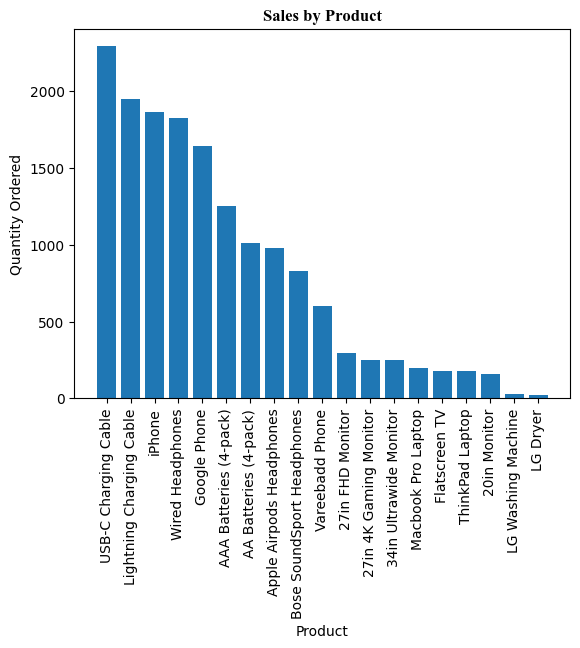

In [26]:
# First, ensure 'Quantity Ordered' is numeric (in case it's been read as a string)
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Group by 'Product' and sum the 'Quantity Ordered' column
product_group = df.groupby('Product')['Quantity Ordered'].sum()

# Sort the products by 'Quantity Ordered' in descending order
product_group_sorted = product_group.sort_values(ascending=False)

# Plot the sorted data
plt.bar(product_group_sorted.index, product_group_sorted.values)
plt.title('Sales by Product', font_dict)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.show()


In [27]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales', 'Hour', 'Minute', 'Count',
       'Grouped'],
      dtype='object')

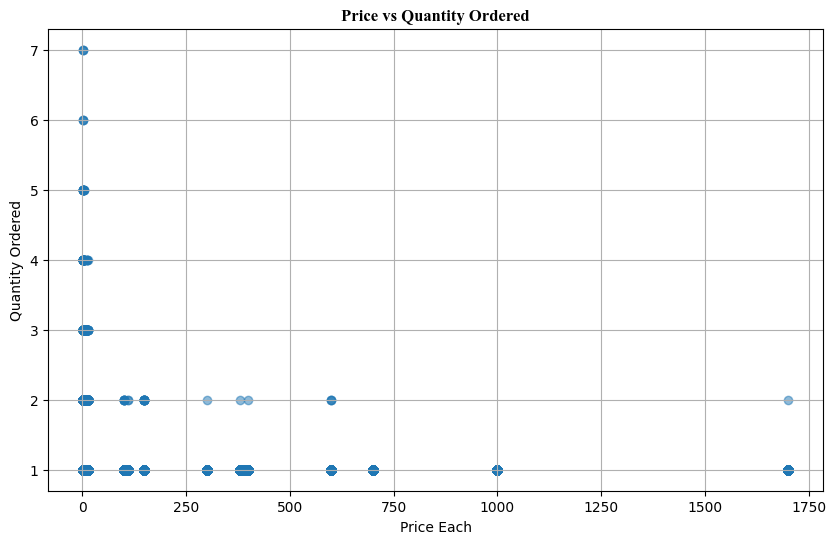

Correlation coefficient between Price and Quantity Ordered: -0.16195917711075924


In [29]:
# Ensure 'Quantity Ordered' and 'Price Each' are numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Drop rows with missing or invalid data
cleaned_data = df.dropna(subset=['Quantity Ordered', 'Price Each'])


plt.figure(figsize=(10,6))
plt.scatter(cleaned_data['Price Each'], cleaned_data['Quantity Ordered'], alpha=0.5)
plt.title('Price vs Quantity Ordered', font_dict)
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = cleaned_data[['Price Each', 'Quantity Ordered']].corr().iloc[0, 1]
print(f'Correlation coefficient between Price and Quantity Ordered: {correlation_coefficient}')
